# Percolation Project

By Ashe Daniels, Dan Phillips, Finlay Dowds and Udayan Nayyar

## Contents

- Core
    0. [Introduction](#Introduction)
    1. [Visualising Percolation](#1.-Visualising-Percolation)
    2. [Left to Right Path Checking](#2.-Left-to-Right-Path-Checking)
    3. [Optimising Path Checks](#3.-Optimising-Path-Checks)
    4. [Path Probabilities](#4.-Path-Probabilities)
- Extensions
    5. [Rectangular Grids](#5.-Rectangular-Grids)
    6. [Centre to Edge Path Checking](#6.-Centre-to-Edge-Path-Checking)
    7. [Triangular Lattices](#7.-Triangular-Lattices)
    8. [Exploring Paths on Segments of Triangular Lattices](#11.-Exploring-Paths-on-Segments-of-Triangular-Lattices-(Advanced))
- Conclusion
    - [Conclusion](#Conclusion)
    - [References](#References)
    

## Introduction
Percolation theory is a powerful framework used to model a wide range of physical and social phenomena, from the flow of fluids through porous materials to the path of electricity in a wire[[1]](#References). In this report, we will explore the mathematics behind percolation, seeking to model the paths between two regions of a lattice. We will start by  laying the groundwork for percolation analysis, delving into basic examples of percolation on various lattice configurations. We will investigate pathways within square, rectangular, and triangular grids and will explore paths on segments and rotations of triangular lattices. 

This project report is structured to reflect the discussion points described in the project description guidance.

In [6]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import timeit
import sys

## 1. Visualising Percolation

To begin, we will define a function to build a basic grid to then explore percolation. Using the below function `make_grid`, we build a graph of size $N\times N$ of yellow and blue sites. The colour of each site is determined through an independent Bernoulli trial with probability $p$ of being yellow, and probability $1-p$ of being blue.

In [18]:
# Function to create the percolation grid
def make_grid(N, p, show=False):
    # Create a grid of zeroes with size N x N
    grid = np.zeros((N, N))
    
    # Iterate over each cell in the grid
    for i in range(N):
        for j in range(N):
            # Generate a random number between 0 and 1
            randnumber = random.random()
            
            # If the random number is less than or equal to p, set the cell value to 1
            if randnumber <= p:
                grid[i, j] = 1

    # Define the colours and colourmap for visualisation
    colors = ['#0000FF', '#FFFF00']
    cmap = ListedColormap(colors)

    # Plot the grid if show parameter is True
    if show:
        plt.figure()
        plt.pcolor(grid, cmap=cmap, vmin=0,vmax=1)
        plt.colorbar()
        plt.show()

    # Return the generated grid
    return grid


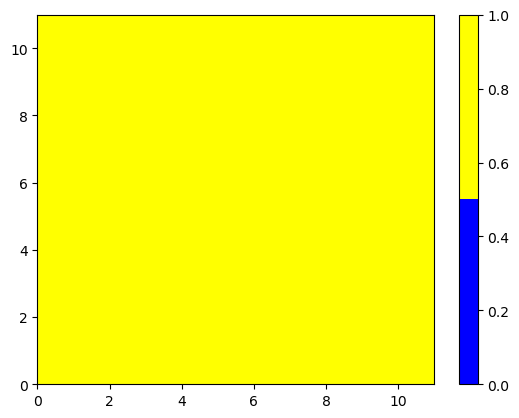

In [19]:
A = make_grid(11, 1, True)

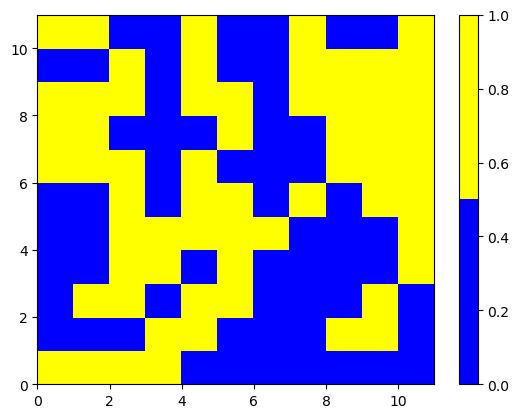

In [20]:
B = make_grid(11, 0.5, True)

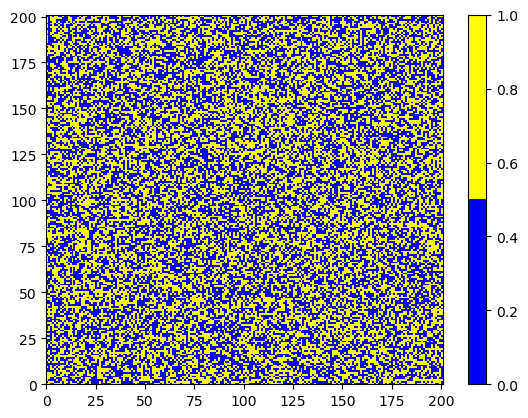

In [21]:
C = make_grid(201, 0.5, True)

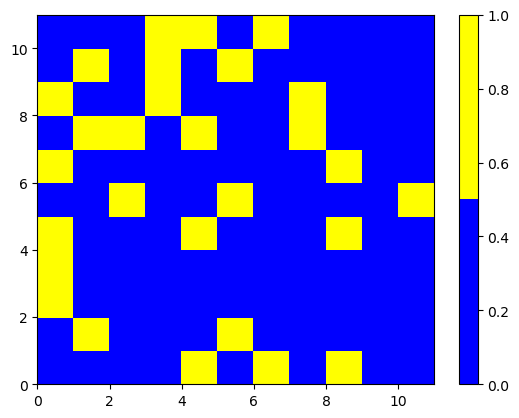

In [22]:
D = make_grid(11, 0.2, True)

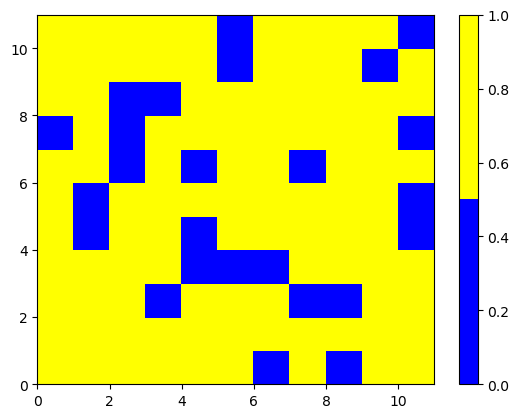

In [23]:
E = make_grid(11, 0.8, True)

## 2. Left to Right Path Checking

Now we want to check a generated grid for a path from left to right of yellow sites. We will name this function `is_path`, where we take the grid corresponding to a blue and yellow grid as our input. The output of this function will either be $1$ if a path exists or $0$ if a path does not exist. This function uses a Breadth First Algorithm to check if a path exists. The benefits and efficiency of this approach will be explored in the next section.

In [26]:
# Function to check if there exists a path from the left side to the right side of the grid
def is_path(grid, verbose=False, show = False):
    # List to store reachable cells
    reachable = []
    
    # Get the dimensions of the grid
    d, d = np.shape(grid)
    
    # Check the leftmost column for reachable cells
    for i in range(d):
        if grid[i, 0] == 1:
            reachable.append((i, 0))
    
    # Print reachable cells if verbose mode is enabled
    if verbose:
        print(reachable)
  
    # Explore neighbouring cells of reachable cells
    for a in reachable:
        if verbose:
            print("this is the inspected element:", a)
        i, j = a
        
        # Check if cell above is reachable
        if i - 1 > 0 and grid[i - 1, j] == 1:
            if (i - 1, j) not in reachable:
                reachable.append((i - 1, j))
                if verbose:
                    print(reachable)
        
        # Check if cell below is reachable
        if i + 1 < d and grid[i + 1, j] == 1:
            if (i + 1, j) not in reachable:
                reachable.append((i + 1, j))
                if verbose:
                    print(reachable)
        
        # Check if cell to the left is reachable
        if j - 1 > 0 and grid[i, j - 1] == 1:
            if (i, j - 1) not in reachable:
                reachable.append((i, j - 1))
                if verbose:
                    print(reachable)
        
        # Check if cell to the right is reachable
        if j + 1 < d and grid[i, j + 1] == 1:
            if (i, j + 1) not in reachable:
                reachable.append((i, j + 1))
                if verbose:
                    print(reachable)
        
    # Print the final list of reachable cells if verbose mode is enabled
    if verbose:
        print("this is the final reachable list:", reachable)
    
    # List to store end points of the grid
    end_points = []
    
    # Check the rightmost column for end points
    for i in range(d):
        if grid[i, d - 1] == 1:
            end_points.append((i, d - 1))
    
# Show the reachable squares in red if show is True
    if show:
        temp_grid = grid.copy()
        for i in reachable:
            temp_grid[i] = 2
        colors2 = ['#0000FF', '#FFFF00', '#FF0000']
        cmap2 = ListedColormap(colors2)
        plt.figure()
        plt.pcolor(temp_grid, cmap=cmap2, vmin=0,vmax=2)
        plt.colorbar()
        plt.show()

    # Print end points if verbose mode is enabled
    if verbose:
        print("these are the end points:", end_points)
    
        
    # Check if any end point is reachable
    for end_point in end_points:
        if end_point in reachable:
            if verbose:
                print('path')
            return 1
    
    # If no path is found, print 'no path' if verbose mode is enabled
    if verbose:
        print('no path')
    return 0


In [27]:
def test_for_path(grid): # Checking for a path, and displaying the reachable squares
    if is_path(grid, False, True)==1:
        return 'There is a path from left to right.'
    else:
        return 'There is not a path from left to right.'

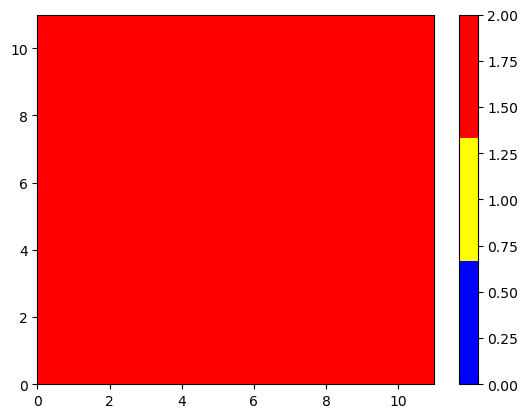

'There is a path from left to right.'

In [28]:
test_for_path(A)

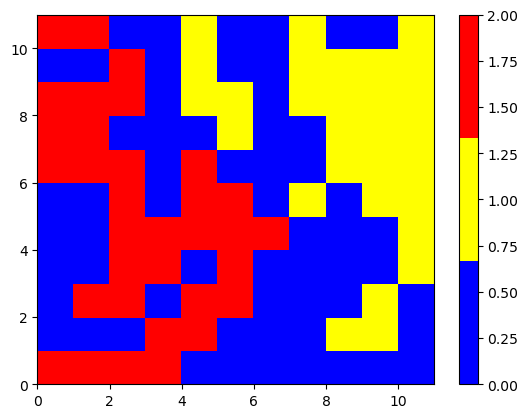

'There is not a path from left to right.'

In [29]:
test_for_path(B)

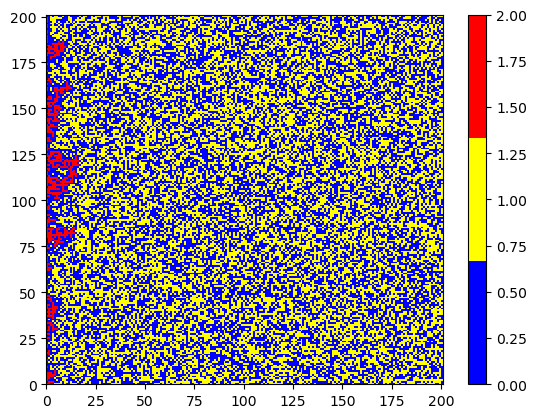

'There is not a path from left to right.'

In [30]:
test_for_path(C)

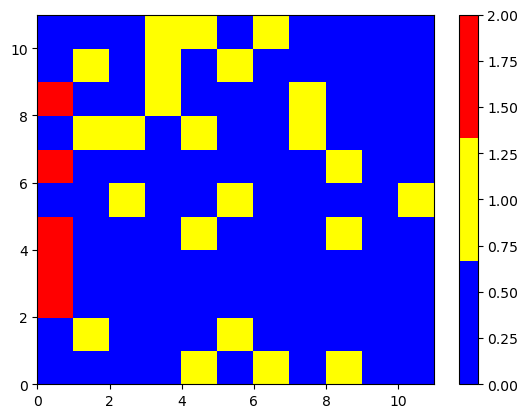

'There is not a path from left to right.'

In [31]:
test_for_path(D)

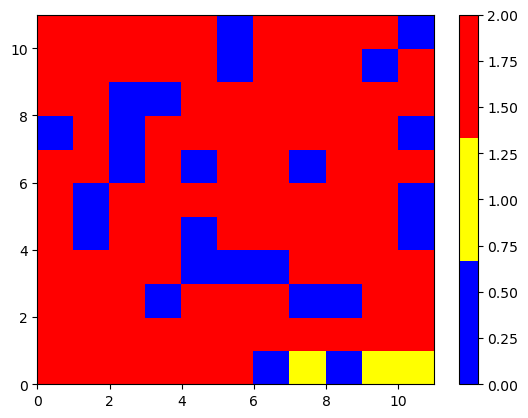

'There is a path from left to right.'

In [32]:
test_for_path(E)

## 3. Optimising Path Checks
The above 'Breadth First' algorithm is inefficient. We can use a Depth First Search (DFS) algorithm to optimise this problem. DFS is a 'graph traversal algorithm', and our percolation problem can be modelled as a graph - i.e. a data structure where the percolation sites are vertices, and are connected by edges. DFS was originally invented by mathematician Charles Pierre Trémaux in the 19th century to solve mazes[[2]](#References). It is a suitable choice of algorithm since it first traverses down each specific 'branch' (possible path for percolation) and finishing when it first discovers a path, as opposed to a Breadth First Search, which explores each branch to a given depth before continuing to the next depth level. As such, DFS is efficient for finding if there exists a percolation path.


It has a time complexity of $O(N^2)$, meaning as our grid size $N$ increases, the running time of the algorithm increases quadratically. This is efficient for a reasonable grid size, and an improvement from the breadth first algorithm above.

It improves upon the previous function by:
- Ensuring each site is only checked once
- Using an array of reachable sites so each possible path is checked as far as it goes instead of checking all paths at the same time
- Stopping as soon as the function finds there is a possible path.

Furthermore, we will implement the function recursively rather than iteratively. Although iterative DFS would allow for explicit stack management, which uses less memory and can help prevent stack overflow, we choose a recursive DFS as it is a lot simpler to implement, mirroring the structure of a tree traversal problem. As such, our code is more readable and concise. In addition, recursion utilises Python's call stack which is handled by the Python interpreter so there is no need to include an explicit stack. This makes our code more elegant and reduces chances of errors related to manual stack management.

In [33]:
# Depth-First Search (DFS) function to check for path from left to right
def dfs(grid, visited, row, col, N, path, verbose):
    # Check if the current cell is out of bounds, not yellow, or already visited
    if row < 0 or row >= N or col < 0 or col >= N or grid[row, col] == 0 or visited[row, col]:
        return False
    
    # Mark the current cell as visited
    visited[row, col] = True
    
    # Print the coordinates of the current site if verbose mode is on
    if verbose:
        print("This is the inspected site:", (row, col))
    
    # If reached the rightmost column, add the current cell to the path and return True
    if col == N-1:
        path.append((row,col))
        return True
    
    # Explore all 4 directions recursively
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for (dr, dc) in directions:
        # Recursive call for each direction
        if dfs(grid, visited, row + dr, col + dc, N, path, verbose):
            path.append((row,col))  # Add the current cell to the path
            return True
    
    # If no path found in any direction, return False
    return False

def check_percolation(grid, show = False, verbose = False):
    N,N = np.shape(grid)
    path = []
    visited = np.zeros((N, N), dtype=bool)
    
    # Use dfs function to recursively check for a path
    for row in range(N):
        if dfs(grid, visited, row, 0, N, path, verbose):
    
    # Print a graph showing the path in red
            if show:
                temp_grid = grid.copy()
                for i in path:
                    temp_grid[i] = 2
                colors2 = ['#0000FF', '#FFFF00', '#FF0000']
                cmap2 = ListedColormap(colors2)
                plt.figure()
                plt.pcolor(temp_grid, cmap=cmap2, vmin=0,vmax=2)
                plt.colorbar()
                plt.show()
            if verbose:
                print("this is the path:", path)
            return True
    if show:
            temp_grid = grid.copy()
            for i in path:
                temp_grid[i] = 2
            colors2 = ['#0000FF', '#FFFF00', '#FF0000']
            cmap2 = ListedColormap(colors2)
            plt.figure()
            plt.pcolor(temp_grid, cmap=cmap2, vmin=0,vmax=2)
            plt.colorbar()
            plt.show() 
    return False

Now to test this algorithm against a variety of grids. 

In [34]:
def test_for_dfs_path(grid): # Checking for a path using dfs, and displaying the reachable sites
    if check_percolation(grid, True):
        return 'There is a path from left to right.'
    else:
        return 'There is not a path from left to right.'

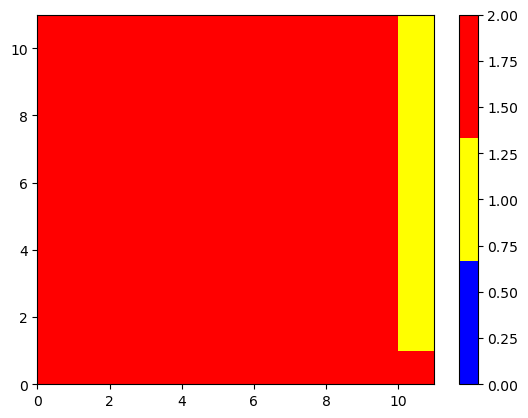

'There is a path from left to right.'

In [35]:
test_for_dfs_path(A)

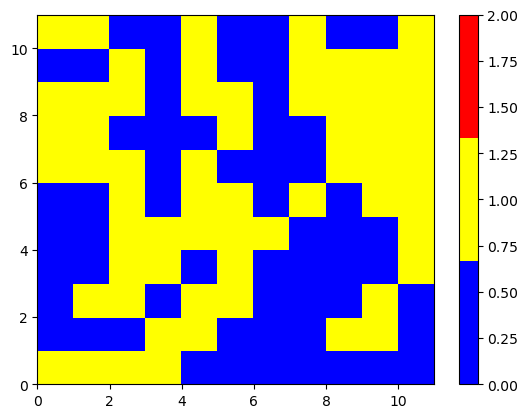

'There is not a path from left to right.'

In [36]:
test_for_dfs_path(B)

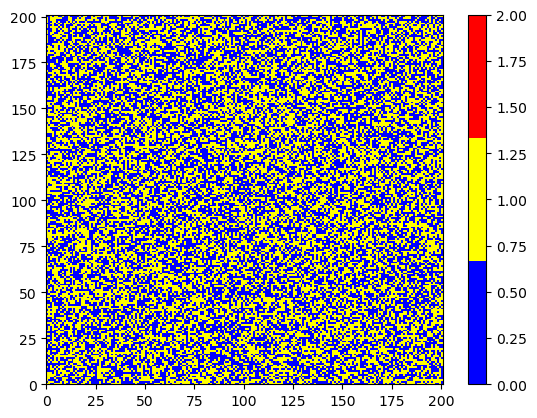

'There is not a path from left to right.'

In [37]:
test_for_dfs_path(C)

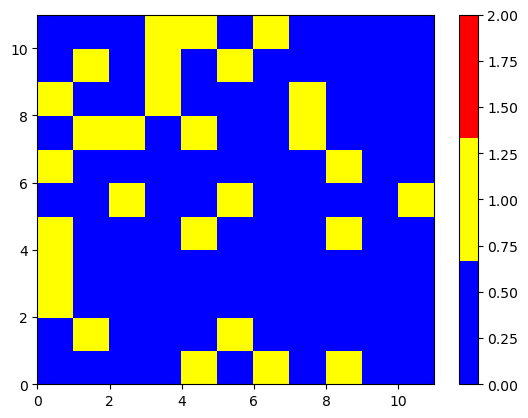

'There is not a path from left to right.'

In [38]:
test_for_dfs_path(D)

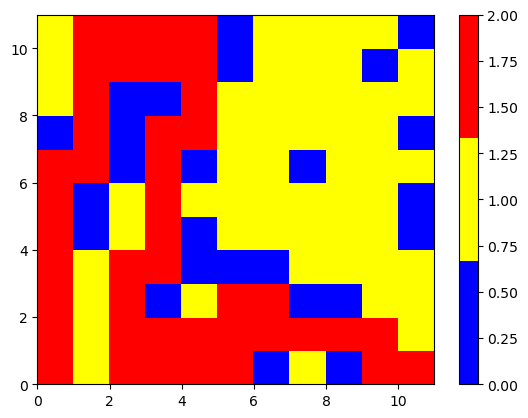

'There is a path from left to right.'

In [39]:
test_for_dfs_path(E)

We will now compare the breadth first function `is_path` against the new, more efficient depth first function `check_percolation` using `timeit`. We will run $200$ test grids with size $N=200$ and with probability $p=0.5$ and take the average time for each function to check a grid. 

In [47]:
print("Average time taken for breadth first is_path() is:", timeit.timeit(stmt='is_path(make_grid(200, 0.5))', globals=globals(), number=200)/10, "seconds.")
print("Average time taken for check_percolation() is:", timeit.timeit(stmt='check_percolation(make_grid(200, 0.5))', globals=globals(), number=200)/10, "seconds.")

Average time taken for breadth first is_path() is: 0.43358689999986383 seconds.
Average time taken for check_percolation() is: 0.18481143999997585 seconds.


Clearly, our new approach is much more efficient. It checks a given grid around 50% faster.

## 4. Path Probabilities
We will begin by defining the function;

$$
F_n(p)=
\mathbb{P}(\text{there is a yellow path connecting the left and right sides of a grid with size } n\times n).
$$

Where $p$ is the probability that a given site is yellow.

Now, we will explore the $\textbf{critical point}$, $p_c$, of percolation. This is the probability at which as $n \rightarrow \infty$, 

$$
F_n(p)=
\begin{cases}
0,& p<p_c\\
1,& p>p_c \text{ .}
\end{cases}$$



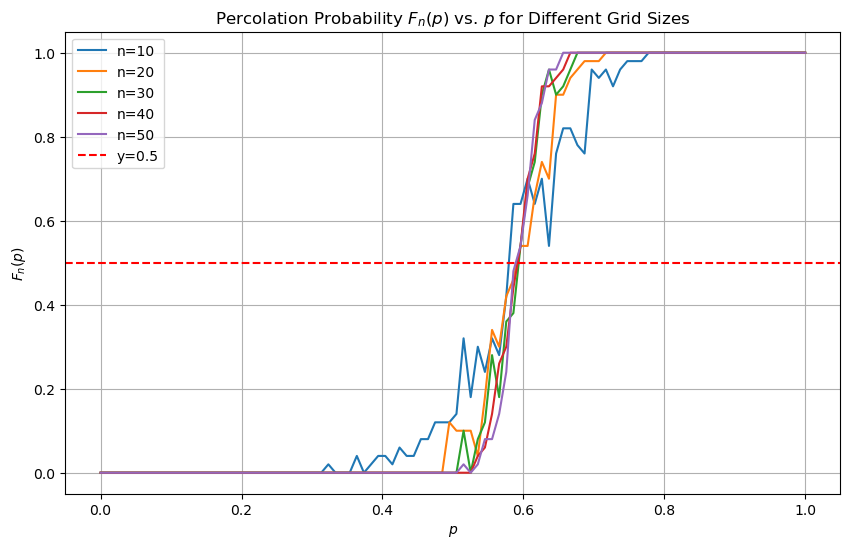

In [48]:
def calculate_Fn(p, n, num_trials=50):
    percolating_count = 0
    for i in range(num_trials):
        grid = make_grid(n, p)
        if check_percolation(grid):
            percolating_count += 1
    return percolating_count / num_trials


#Parameters
p_values = np.linspace(0, 1, 100)  #Probability values from 0 to 1
n_values = [10,20,30,40,50]  #Grid sizes


#Calculate Fn(p) for different n values
Fn_values = {n: [calculate_Fn(p, n) for p in p_values] for n in n_values}


#Plot Fn(p) for each n value
plt.figure(figsize=(10, 6))
for n in n_values:
    plt.plot(p_values, Fn_values[n], label=f'n={n}')


plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.xlabel('$p$')
plt.ylabel('$F_n(p)$')
plt.title('Percolation Probability $F_n(p)$ vs. $p$ for Different Grid Sizes')
plt.legend()
plt.grid(True)

From the above graph, it is clear the critical point is $p\approx0.6$. To determine a more precise critical point, we will repeat the function with larger values of $n$. As $n$ increases, the size of the grid increases quadratically so the time to check for a path also increases. We will only view a segment of the graph around $p=0.6$ so we can more easily identify the critical point.

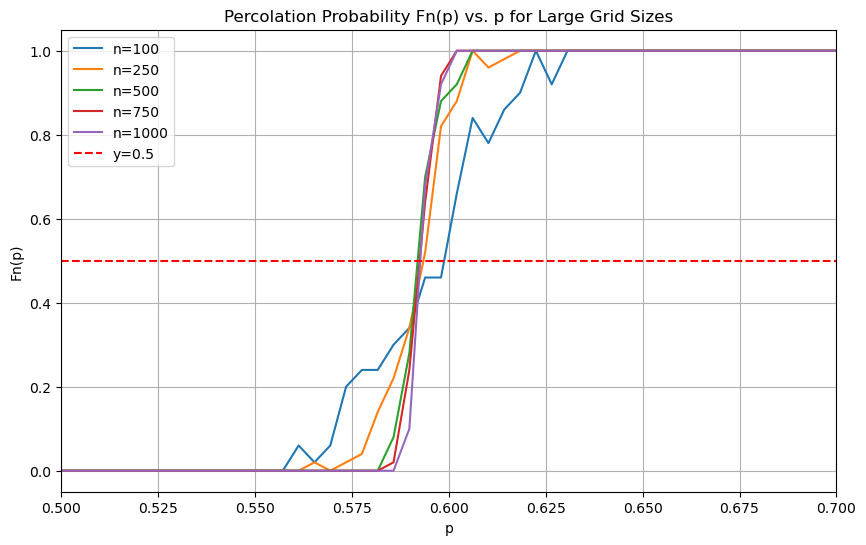

In [49]:
# Increasing Python recursion limit so that we can run DFS for large grid sizes
sys.setrecursionlimit(1000000000)
# Larger Parameters
p_values = np.linspace(0.5, 0.7, 50)  #Probability values
big_n_values = [100, 250, 500, 750, 1000]  #Grid sizes


#Calculate Fn(p) for different n values
Fn_values = {n: [calculate_Fn(p, n) for p in p_values] for n in big_n_values}


#Plot Fn(p) for each n value
plt.figure(figsize=(10, 6))
for n in big_n_values:
    plt.plot(p_values, Fn_values[n], label=f'n={n}')


plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.xlabel('p')
plt.ylabel('Fn(p)')
plt.title('Percolation Probability Fn(p) vs. p for Large Grid Sizes')
plt.xlim(0.5,0.7)
plt.legend()
plt.grid(True)

By investigating larger grids, we can better interpret how the function would behave as $n \rightarrow \infty$. From this graph, the critical point is more apparent and is around $p\approx0.59$.

The above sections provide a strong basis to explore some variations on this simple percolation problem.

## 5. Rectangular Grids
Now to consider the same percolation problem but in the case of rectangular grids. To begin we will adapt the `make_grid` function to plot rectangular grids, as opposed to square grids, demonstrated in the examples below.

In [24]:
# Function to create a rectangular percolation grid
def make_rectangular_grid(M, N, p, show=False):
    # Create a grid of zeroes with size M x N
    grid = np.zeros((M, N))
    
    # Iterate over each cell in the grid
    for i in range(M):
        for j in range(N):
            # Generate a random number between 0 and 1
            randnumber = random.random()
            
            # If the random number is less than or equal to p, set the cell value to 1 (yellow)
            if randnumber <= p:
                grid[i, j] = 1

    # Define the colours and colourmap for visualization
    colors = ['#0000FF', '#FFFF00']  # Blue for 0, Yellow for 1
    cmap = ListedColormap(colors)

    # Plot the grid if the show parameter is True
    if show:
        plt.pcolor(grid, cmap=cmap, vmin=0, vmax=1)
        plt.colorbar()
        plt.gca().set_aspect('equal')
        plt.show()

    # Return the generated grid
    return grid



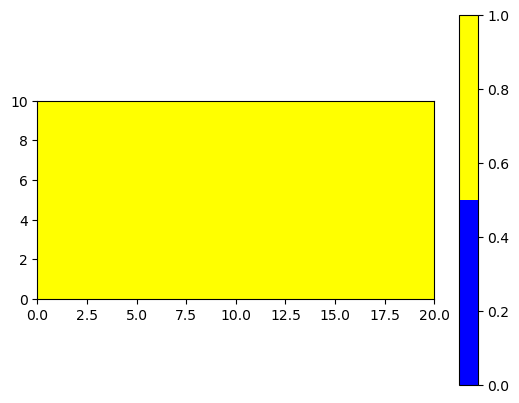

In [51]:
A1 = make_rectangular_grid(10,20, 1, show=True) #Creates the same grid as for the N X N grids but for a 2N X N grid

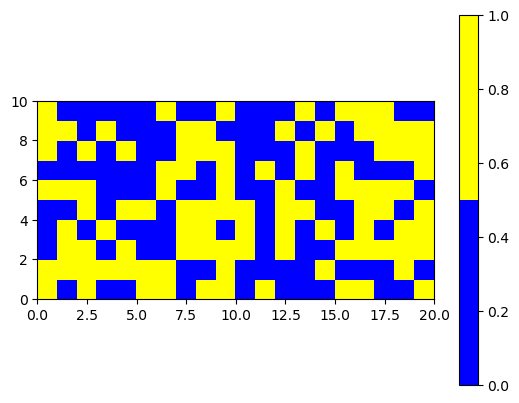

In [52]:
B1 = make_rectangular_grid(10,20, 0.5, show=True)

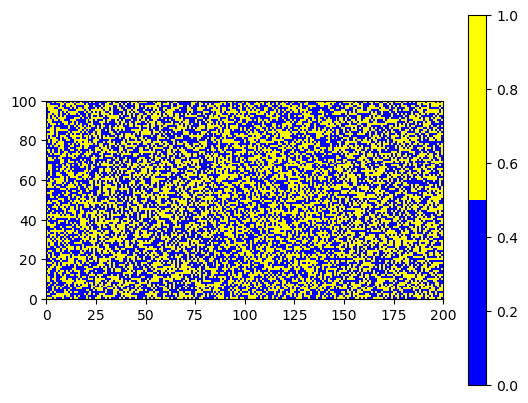

In [53]:
C1 = make_rectangular_grid(100,200, 0.5, show=True)

We will now adapt the above Depth First Search approach for rectangular grids.

In [54]:
# Depth-First Search (DFS) function to check for path from left to right
def dfs_rec(grid, visited, row, col, M, N, path):
    if row < 0 or row >= M or col < 0 or col >= N or grid[row, col] == 0 or visited[row, col]:
        return False
    
    visited[row, col] = True
    
    if col == N-1:
        path.append((row,col))
        return True  # Found a path to the right side
    
    # Check in all 4 directions    
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for (dr, dc) in directions:
        if dfs_rec(grid, visited, row + dr, col + dc, M, N, path):
            path.append((row,col))
            return True
        
    return False

def check_rec_percolation(grid, show = False, verbose=False):
    M,N = np.shape(grid)
    path = []
    visited = np.zeros((M, N), dtype=bool)
    
    # Use dfs function to iteratively check for a path
    for row in range(M):
        if dfs_rec(grid, visited, row, 0, M, N, path):
            
    # Print a graph showing the path in red
            if show:
                temp_grid = grid.copy()
                for i in path:
                    temp_grid[i] = 2
                if verbose == True:
                    print(temp_grid)
                    print(path)
                colors2 = ['#0000FF', '#FFFF00', '#FF0000']
                cmap2 = ListedColormap(colors2)
                plt.figure()
                plt.pcolor(temp_grid, cmap=cmap2, vmin=0,vmax=2)
                plt.gca().set_aspect('equal')
                plt.colorbar()
                plt.show()               
            return True
    if show:
            temp_grid = grid.copy()
            for i in path:
                temp_grid[i] = 2
            if verbose == True:
                print(temp_grid)
                print(path)
            colors2 = ['#0000FF', '#FFFF00', '#FF0000']
            cmap2 = ListedColormap(colors2)
            plt.figure()
            plt.pcolor(temp_grid, cmap=cmap2, vmin=0,vmax=2)
            plt.gca().set_aspect('equal')
            plt.colorbar()
            plt.show() 
    return False

Now to verify this algorithm against the grids generated above.

In [55]:
def test_for_dfs_path_rectangle(grid): # Checking for a path using dfs, and displaying the reachable squares
    if check_rec_percolation(grid, True):
        return 'There is a path from left to right.'
    else:
        return 'There is not a path from left to right.'

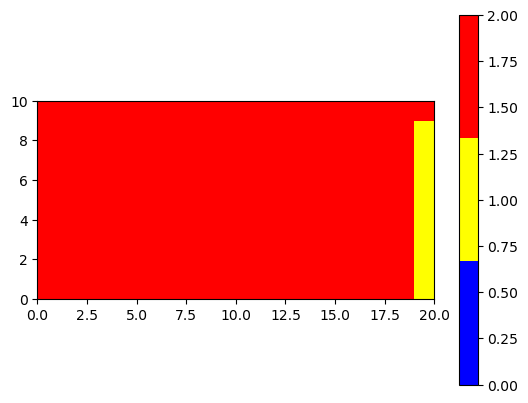

'There is a path from left to right.'

In [56]:
test_for_dfs_path_rectangle(A1)

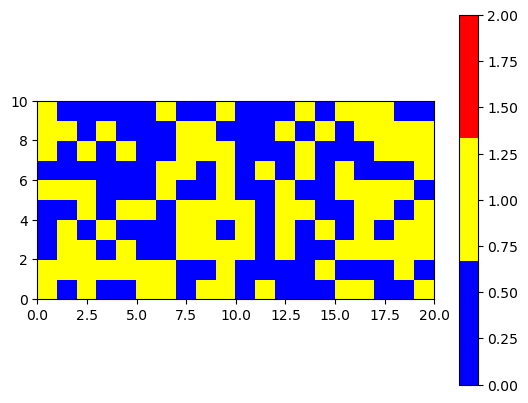

'There is not a path from left to right.'

In [57]:
test_for_dfs_path_rectangle(B1)

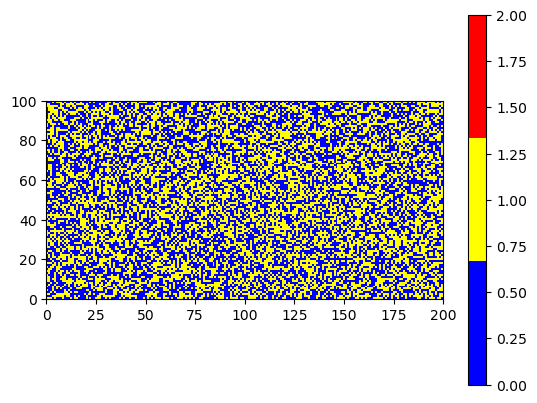

'There is not a path from left to right.'

In [58]:
test_for_dfs_path_rectangle(C1)

Now to explore the function $F_n(p)$ for rectangular grids and plot the graph to estimate the critical point. We will plot two grids; one investigating large $n \times 2n$ grids, and another of $2n \times 3n$ grids.

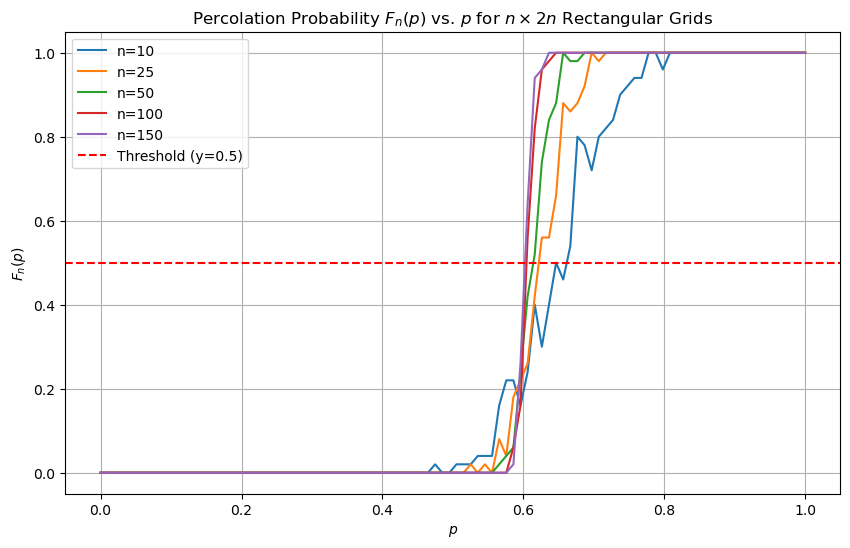

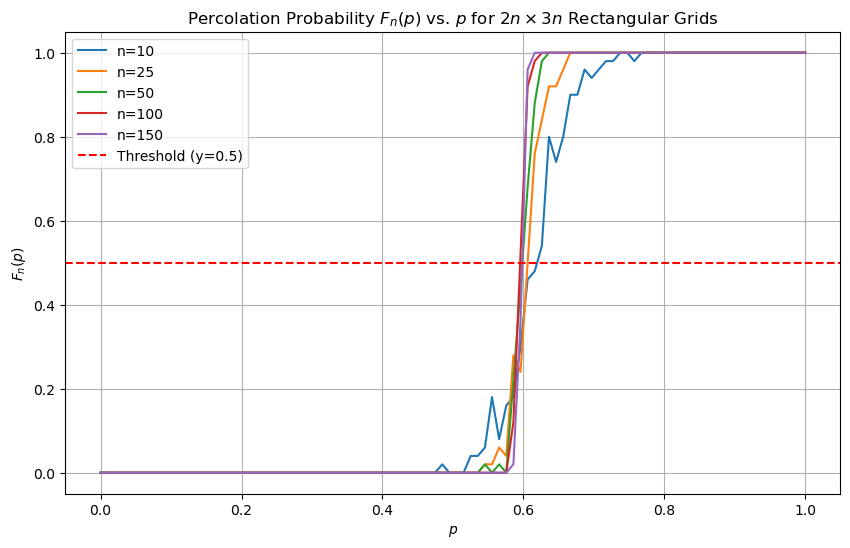

In [59]:
def calculate_rec_Fn(p, n, m, num_trials=50):
    count = 0
    for _ in range(num_trials):
        grid = make_rectangular_grid(n, m, p)
        if check_rec_percolation(grid):
            count += 1
    return count / num_trials

# Parameters
p_values = np.linspace(0, 1, 100)  #Probability values from 0 to 1
n_values = [10, 25, 50, 100, 150]  #Grid sizes

results_1x2 = {}
plt.figure(figsize=(10, 6))
for n in n_values:
    Fn_values_1x2 = [calculate_rec_Fn(p, n, 2*n) for p in p_values]
    results_1x2[n] = Fn_values_1x2
    plt.plot(p_values, Fn_values_1x2, label=f'n={n}')

plt.xlabel('$p$')
plt.ylabel('$F_n(p)$')
plt.title(r'Percolation Probability $F_n(p)$ vs. $p$ for $n \times 2n$ Rectangular Grids')
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold (y=0.5)')
plt.legend()
plt.grid(True)
plt.show()

results_2x3 = {}
plt.figure(figsize=(10, 6))
for n in n_values:
    Fn_values_2x3 = [calculate_rec_Fn(p, 2*n, 3*n) for p in p_values]
    results_2x3[n] = Fn_values_2x3
    plt.plot(p_values, Fn_values_2x3, label=f'n={n}')

plt.xlabel('$p$')
plt.ylabel('$F_n(p)$')
plt.title(r'Percolation Probability $F_n(p)$ vs. $p$ for $2n \times 3n$ Rectangular Grids')
plt.axhline(y=0.5, color='red', linestyle='--', label='Threshold (y=0.5)')
plt.legend()
plt.grid(True)
plt.show()

From the graph, it is clear that the critical point, $p_c$, is  around $0.6$ for a rectangular grid. This is the same as the critical point we established for square grids above. We will discuss the mathematics of the critical point further when investigating triangular lattices.

## 6. Centre to Edge Path Checking
We will define a new function; 

$$G_n(p) = \mathbb{P} (\text{there is a yellow path connecting the centre of the grid to the boundary}).$$ 

We will investigate $G_n(p)$ for square grids of varying size, and then investigate its limit

$$G(p) = lim_{n \to \infty} G_n(p).$$

In [15]:
def dfs_centre_to_edge(grid, visited, row, col, N, path):
    if row < 0 or row >= N or col < 0 or col >= N or grid[row, col] == 0 or visited[row, col]:
        return False
    
    visited[row, col] = True
    
    if col == N-1 or col == 0 or row == N-1 or row == 0:
        path.append((row,col))
        return True  # Found a path to any boundary - this is the difference from the original DFS function
    
    # Check in all 4 directions
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for (dr, dc) in directions:
        if dfs_centre_to_edge(grid, visited, row + dr, col + dc, N, path):
            path.append((row,col))
            return True
        
    return False
def check_percolation_centre_to_edge(grid, show=False):
    N, N = np.shape(grid)
    path = []
    visited = np.zeros((N, N), dtype=bool)
    
    # Use dfs function to recursively check for a path
    for row in range(N):
        if dfs_centre_to_edge(grid, visited, N//2, N//2, N, path): #starting from the centre of the grid (N//2, N//2)
            if show:
                temp_grid = grid.copy()
                for i in path:
                    temp_grid[i] = 2
                colors2 = ['#0000FF', '#FFFF00', '#FF0000']
                cmap2 = ListedColormap(colors2)
                plt.figure()
                plt.pcolor(temp_grid, cmap=cmap2, vmin=0, vmax=2)
                plt.colorbar()
                plt.show()
            return True
    if show:
        temp_grid = grid.copy()
        for i in path:
            temp_grid[i] = 2
        colors2 = ['#0000FF', '#FFFF00', '#FF0000']
        cmap2 = ListedColormap(colors2)
        plt.figure()
        plt.pcolor(temp_grid, cmap=cmap2, vmin=0,vmax=2)
        plt.colorbar()
        plt.show() 
    
    return False

def test_for_dfs_centre_to_edge(grid): # Checking for a path from centre to boundary using dfs, and displaying the reachable squares
    if check_percolation_centre_to_edge(grid, True):
        return 'There is a path from the centre to the boundary.'
    else:
        return 'There is not a path from the centre to the boundary.'

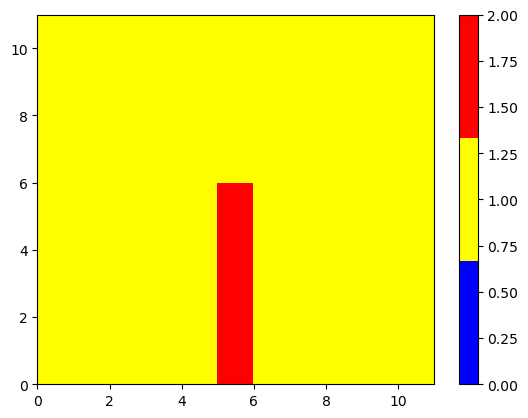

'There is a path from the centre to the boundary.'

In [40]:
test_for_dfs_centre_to_edge(A)

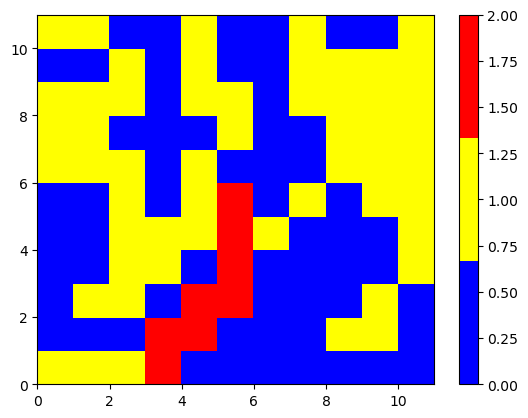

'There is a path from the centre to the boundary.'

In [41]:
test_for_dfs_centre_to_edge(B)

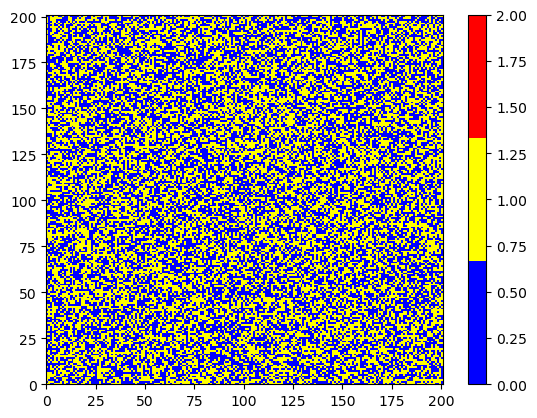

'There is not a path from the centre to the boundary.'

In [42]:
test_for_dfs_centre_to_edge(C)

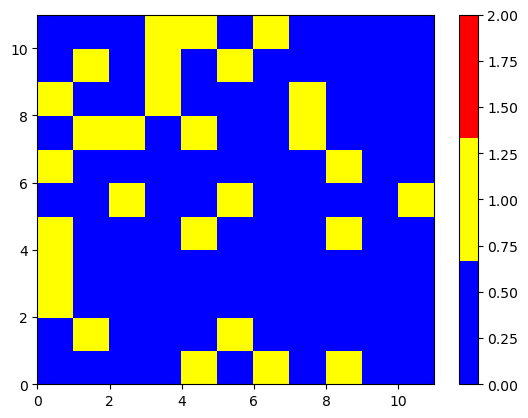

'There is not a path from the centre to the boundary.'

In [43]:
test_for_dfs_centre_to_edge(D)

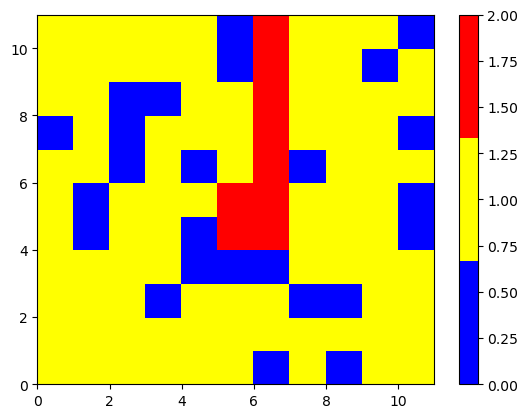

'There is a path from the centre to the boundary.'

In [44]:
test_for_dfs_centre_to_edge(E)

We will now investigate $G(p) = lim_{n \to \infty} G_n(p).$

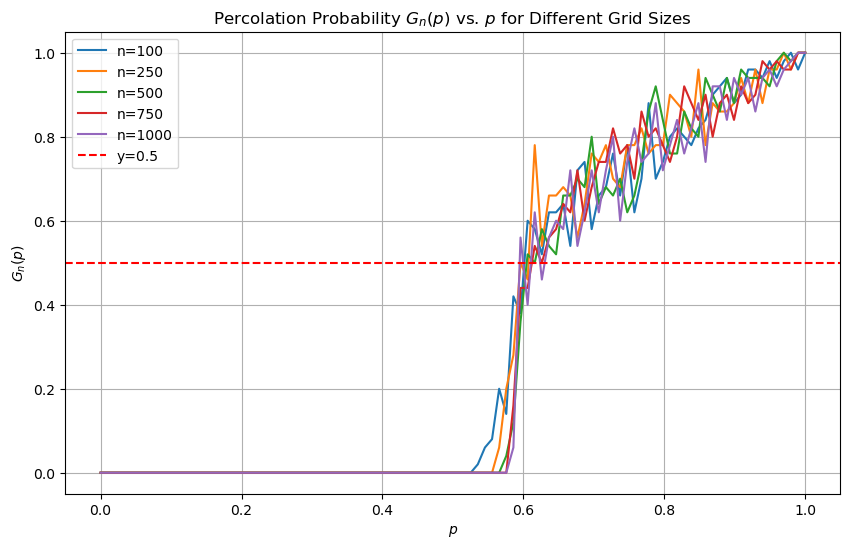

In [66]:
def calculate_Gn(p, n, num_trials=50):
    percolating_count = 0
    for i in range(num_trials):
        grid = make_grid(n, p)
        if check_percolation_centre_to_edge(grid):
            percolating_count += 1
    return percolating_count / num_trials


#Parameters
p_values = np.linspace(0, 1, 100)  #Probability values from 0 to 1
n_values = [100, 250, 500, 750, 1000]  #Grid sizes


#Calculate Gn(p) for different n values
Gn_values = {n: [calculate_Gn(p, n) for p in p_values] for n in n_values}


#Plot Gn(p) for each n value
plt.figure(figsize=(10, 6))
for n in n_values:
    plt.plot(p_values, Gn_values[n], label=f'n={n}')


plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.xlabel('$p$')
plt.ylabel('$G_n(p)$')
plt.title('Percolation Probability $G_n(p)$ vs. $p$ for Different Grid Sizes')
plt.legend()
plt.grid(True)

From the graph, it is clear the critical point is $p_c\approx0.6$, and a good estimate of $G(p)$ is;

$$G(p)=
\begin{cases}
0,& p<0.6\\
p,& p>0.6\text{.}
\end{cases}$$

Notice that $G(p) = 0$ for $0 < p < p_c$, but $G(p)$ and $p$ have a linear relationship for $0.6 < p_c < 1$. Moreover, our critical point is the same as for left-to-right percolation for rectangular grids and for the original square grid. We can conclude the start and end sites of percolation does not affect the critical point. We will discuss this further when exploring the critical point for a triangular lattice.

## 7. Triangular Lattices
To begin, we will define a function to build a triangular lattice, populated by yellow and blue sites. Then we will look to define a DFS function for triangular lattices to start to explore percolation for this distinct arrangement of sites.

We will use some linear algebra to generate our model since we can view lattices as $\mathbb{Z}$-modules [[3]](#References). We refer the reader to the _Linear Algebra 2_ lectures [[4]](#References) for a definition of a module.

This can be viewed intuitively as a 'vector space' over $\mathbb{Z}$  for the remainder of the project, however the reader should note this is not a well-defined definiton.

As an example, we can alternatively view our square and rectangular grids as lattices. Our square grid would now be represented by $\mathbb{Z}^2$ with our squares going to their respective coordinates. Using linear algebra we could represent this as the $\operatorname{span} _{\mathbb{Z}}\{(1,0),(0,1)\}$ , notice how our basis vectors are  $ \pi / 2 $ radians around the unit circle from each other. This gives us a total of four unique sites around the origin.

For a triangular lattice, each site should have six neighbouring sites (unless our site lives on the boundary of our lattice). We will use some linear algebra to generate this. 

Since we want six unique sites, if we take $(1,0)$ as our first basis vector, we can obtain our second by rotating by $\pi/3$ along the unit circle: $(\frac{1}{2},\frac{\sqrt{3}}{2})$. Both of these vectors are linearly independent and span our lattice. We will refer to our lattice as $\Lambda$, where $\Lambda = \operatorname{span}_{\mathbb{Z}}\{(\frac{1}{2},\frac{\sqrt{3}}{2})\}$. Since $\Lambda$ is a free $\mathbb{Z}$-module of rank $2$, it is therefore a lattice by definition.



In [67]:
def triangle_lattice(n,p,show = False):
    
    # Define lattice basis vectors
    u = np.array([1,0])
    v = np.array([0.5,(0.5*((3)**0.5))])
    
    # Create a matrix of zeroes
    matrix = np.zeros((int(n),int(n)))
    
    # Generating lattice points 
    for i in range(n):
        for j in range(n):
            rand = random.random()
            temp = i*u+j*v
            if rand <= p:
                matrix[i,j] = 1
                if show==True:
                    plt.scatter(temp[0],temp[1],c='yellow')       
            else:
                if show==True:
                    plt.scatter(temp[0],temp[1],c='blue')
        
        # Transposing to ensure rows correspond to u direction and columns correspond to v direction
        matrix_t = matrix.transpose() 
    
    if show==True:
        plt.show()
    return(matrix_t)

In [68]:
def dfs_triangle(matrix_t, visited, xtraverse, ytraverse, row, col, N):
    
    # Base cases for terminating depth-first search
    if row < 0 or row >= N or col < 0 or col >= N or matrix_t[row, col] == 0 or visited[row, col]:
        return False
    
    
    visited[row, col] = True
    
    # Lattice indices are converted to co-ordinates
    u = np.array([1,0])
    v = np.array([0.5,(0.5*((3)**0.5))])
    temp = col*u+row*v
    xtraverse.append(temp[0])
    ytraverse.append(temp[1])
    
    if col == N-1:
        return True  # Found a path to the right side
    
    # There are 6 possible adjacent sites to an initial site in a triangular lattice, so we define 6 directions for
    # searching; left, right and along both diagonals.
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (1,-1),(-1,1)]
    for (dr, dc) in directions:
        if dfs_triangle(matrix_t, visited, xtraverse, ytraverse, row + dr, col + dc, N):
            return True
        
    return False

def check_percolation_t(matrix_t, show = False):
    
    # Initialise visited matrix, and co-ordinate traversal lists
    N,N = np.shape(matrix_t)
    visited = np.zeros((N, N), dtype=bool)
    xtraverse = []
    ytraverse = []
    
    # Carry out DFS from each point in the leftmost column
    for row in range(N):
        if dfs_triangle(matrix_t, visited, xtraverse, ytraverse, row, 0, N):
                
                # Visualisation of the path
                if show==True: 
                    for i in range(N):
                        for j in range(N):
                            u = np.array([1,0])
                            v = np.array([0.5,(0.5*((3)**0.5))])
                            temp = i*u + j*v
                            matrix = matrix_t.transpose()
                            if matrix[i,j] == 1:
                                plt.scatter(temp[0],temp[1],c='yellow')
                            else:
                                plt.scatter(temp[0],temp[1],c='blue')
                                
                    for i in range(len(xtraverse)): # Plot visited points in red to show the percolation path
                        plt.scatter(xtraverse[i],ytraverse[i],c='red')
                    plt.show()
                return True # Found a percolating path
    
    # Visualisation of the grid if there is no path
    if show==True: 
        for i in range(N):
            for j in range(N):
                u = np.array([1,0])
                v = np.array([0.5,(0.5*((3)**0.5))])
                temp = i*u + j*v
                matrix = matrix_t.transpose()
                if matrix[i,j] == 1:
                    plt.scatter(temp[0],temp[1],c='yellow')
                else:
                    plt.scatter(temp[0],temp[1],c='blue')
                                
        for i in range(len(xtraverse)):
            plt.scatter(xtraverse[i],ytraverse[i],c='red')
        plt.show()
    return False

We will investigate the above function $F_n(p)$ for triangular lattices.

In [69]:
def test_for_dfs_triangle_path(matrix_t): # Checking for a path using dfs, and displaying the reachable squares
    if check_percolation_t(matrix_t, True):
        return 'There is a path from left to right.'
    else:
        return 'There is not a path from left to right.'

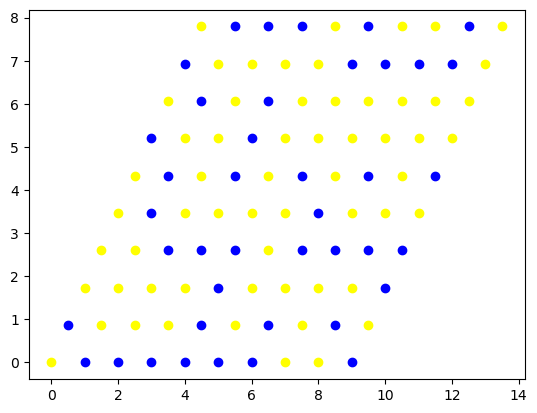

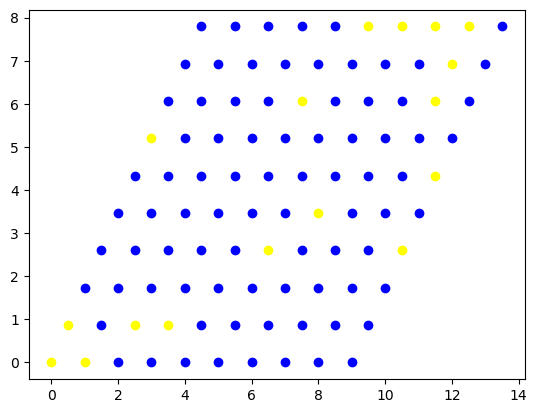

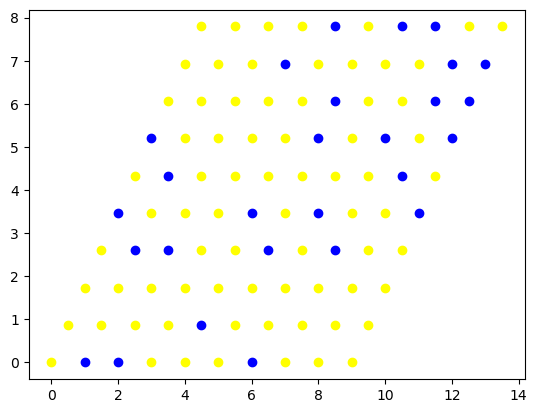

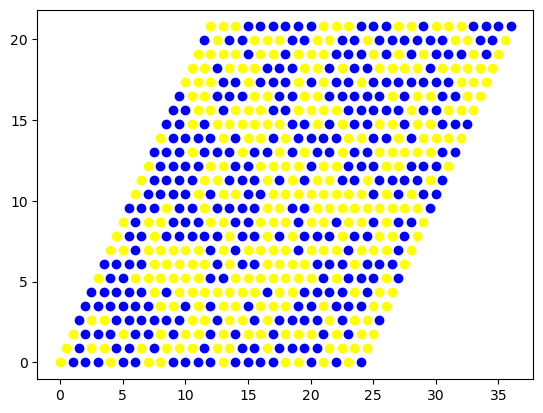

In [70]:
T1 = triangle_lattice(10, 0.5,True)
T2 = triangle_lattice(10, 0.2,True)
T3 = triangle_lattice(10, 0.8,True)
T4 = triangle_lattice(25, 0.5,True)

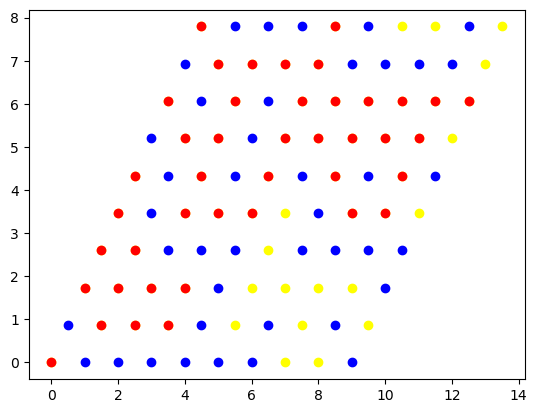

'There is a path from left to right.'

In [71]:
test_for_dfs_triangle_path(T1)

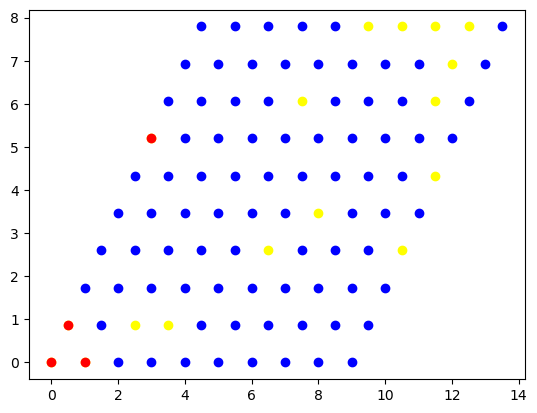

'There is not a path from left to right.'

In [72]:
test_for_dfs_triangle_path(T2)

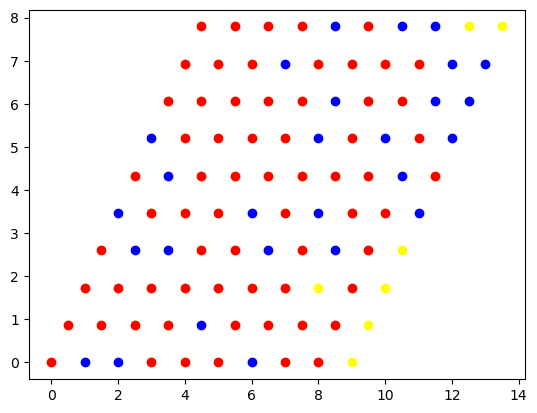

'There is a path from left to right.'

In [73]:
test_for_dfs_triangle_path(T3)

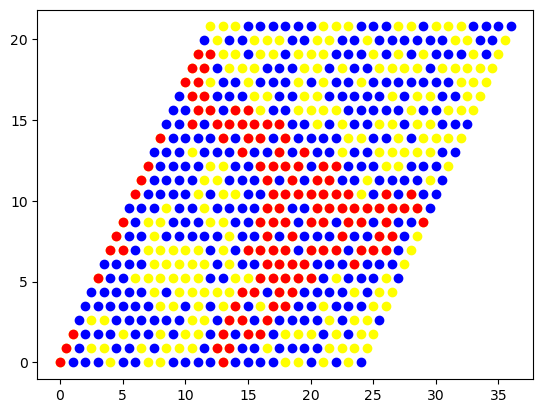

'There is a path from left to right.'

In [74]:
test_for_dfs_triangle_path(T4)

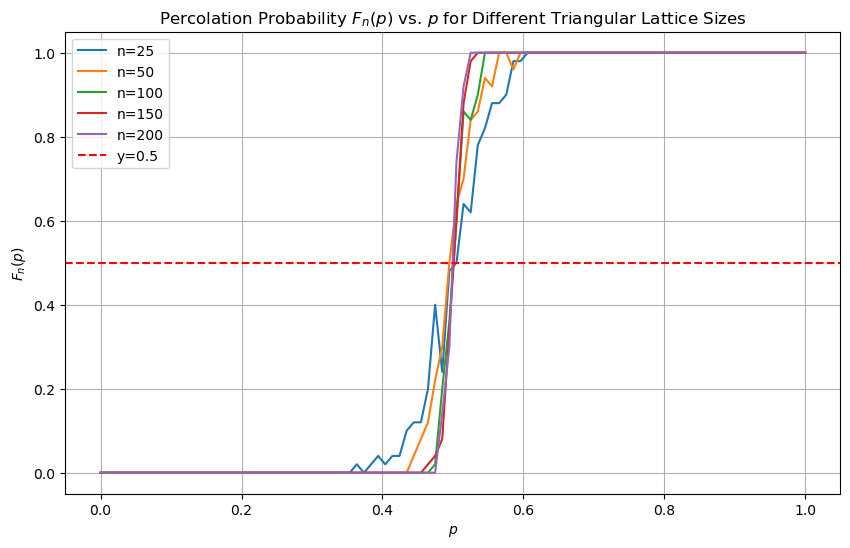

In [75]:
def calculate_triangle_Fn(p, n, num_trials=50):
    percolating_count = 0
    for i in range(num_trials):
        matrix_t = triangle_lattice(n, p)
        if check_percolation_t(matrix_t):
            percolating_count += 1
    return percolating_count / num_trials


#Parameters
p_values = np.linspace(0, 1, 100)  #Probability values from 0 to 1
n_values = [25, 50, 100, 150, 200]  #Grid sizes


#Calculate Fn(p) for different n values
Fn_values = {n: [calculate_triangle_Fn(p, n) for p in p_values] for n in n_values}


#Plot Fn(p) for each n value
plt.figure(figsize=(10, 6))
for n in n_values:
    plt.plot(p_values, Fn_values[n], label=f'n={n}')


plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.xlabel('$p$')
plt.ylabel('$F_n(p)$')
plt.title('Percolation Probability $F_n(p)$ vs. $p$ for Different Triangular Lattice Sizes')
plt.legend()
plt.grid(True)

From the above graph, it is clear the critical point, $p_c$ for a triangular lattice is around $0.5$. Note that this is lower than for left-to-right percolation for the square grid (as found in Section 4), rectangular grid (Section 5), and for the centre-to-edge percolation on the square grid (Section 6). 

The critical point $p_c\approx0.6$ in the previous sections indicates that the direction of percolation, and ratio between the dimensions of a rectangle does not affect the critical point when considering infinitely large grids. To justify this, note that our grids look like $\mathbb{R}^2$ as $n \rightarrow \infty$, regardless of the dimension of the grid. So it is intuitive that there is no difference between critical points for a square and rectangular grid. In the limit as $n \rightarrow \infty$, we can consider $F(p)$ as the probability of there being a yellow percolating path spanning all of $\mathbb{R}^2$, so it follows that there is no difference in critical point between left-to-right percolation and centre-to-edge percolation. 

Moreover with rectangular grids, notice that the lattice used to model percolation is the same, so the connectivity is the same - there are at most four adjacent sites to one site. However, with a triangular lattice there are at most six adjacent sites to one site, so there will be a higher probability of accessing a yellow site from a given starting site as compared to the square lattice, so our percolation probability will be higher. Thus, it is evident that the critical point is lower for triangular lattices as compared to rectangular lattices.

To conclude, our investigations suggest that the only factor affecting critical points for different percolation models is the underlying lattice structure. We conclude that the direction of percolation, and ratio of dimensions of a rectangle do not affect the critical point.


## 11. Exploring Paths on Segments of Triangular Lattices (Advanced)

We will now extend our exploration of percolation on triangular lattices. Now, consider a region in the shape of an equilateral triangle of side length $n$. Taking $p=p_c$, we will investigate the probability $T_n(r)$ that there is a path from the base of the equilateral triangle to the segment of the right side that extends down distance $rn$ from the top vertex.

Below, there is a new function, `delta` with inputs $n$ and $r$ to generate lattices of side length $n$ and to find the segment that extends down distance $rn$ from the top vertex. We have also adapted the previous Depth First path checking algorithm to find a path from the base to the segment described above. Throughout this section, the functions are named for the Greek letter Delta, $\Delta$, as it looks like an equilateral triangle. This avoids confusion with the functions for triangular lattices described in the previous section.

First, we will give examples of the output of this new function `delta` and show percolation on these examples.

In [7]:
# We need to define the global variable, critical point for triangles P_C = 0.5 to use throughout this section.

P_C = 0.5

In [5]:
# The majority of this function is similar to previous triangular lattice generation.
def delta(n,r,show = False):
    # To have a side length of n, each side must contain n+1 sites
    sites = n+1  
    
    # Generate a triangular lattice
    u = np.array([1,0])
    v = np.array([0.5,(0.5*((3)**0.5))])
    matrix = np.zeros((int(sites),int(sites)))
    for i in range(sites):
        for j in range(sites-i):
            rand = random.random()
            temp = i*u+j*v
            if rand <= P_C:
                matrix[i,j] = 1
                if show==True:
                    plt.scatter(temp[0],temp[1],c='yellow')       
            else:
                matrix[i,j] = 2
                if show==True:
                    plt.scatter(temp[0],temp[1],c='blue')

        # Here, we identify the segment that is length nr from the top vertex
        F = n*r
        for i in range(sites):
            if i > F:
                matrix[i,n-i] = 3
                temp2 = i*u+(n-i)*v
                if show==True:
                    plt.scatter(temp2[0],temp2[1],c='black')
                
            
        matrix_t = matrix.transpose()
    
    if show:
        plt.show()
    return(matrix_t)

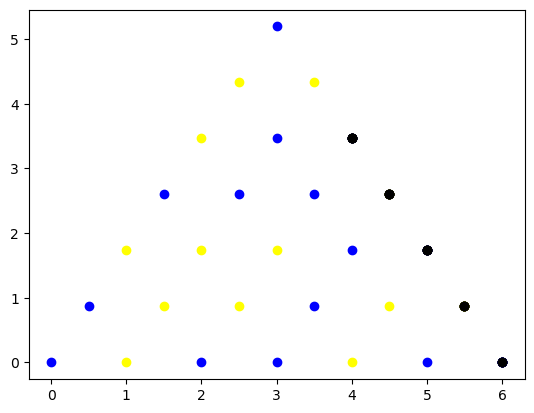

In [78]:
D_A = delta(6,0.2,show=True)

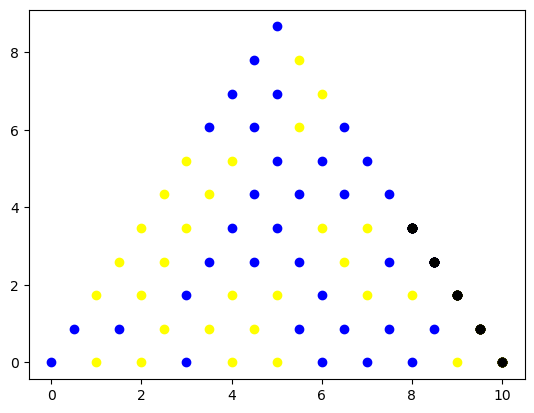

In [79]:
D_B = delta(10,0.5,show=True)

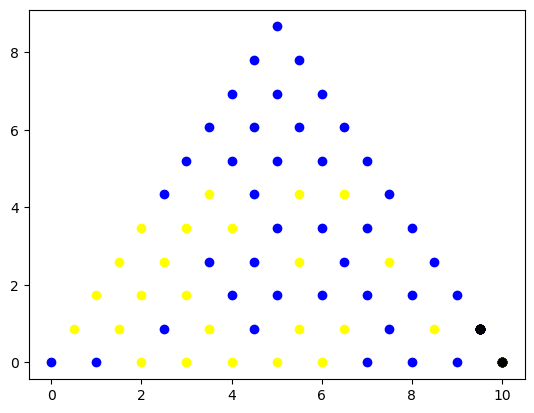

In [80]:
D_C = delta(10,0.8,show=True)

In [6]:
#We now have an amended dfs function and check percolation function for delta
def dfs_delta(matrix_d, visited, xtraverse, ytraverse, row, col, N):
    if row < 0 or row >= N or col < 0 or col >= N or matrix_d[row, col] != 1 or visited[row, col]:
        return False
    
    visited[row, col] = True
    u = np.array([1,0])
    v = np.array([0.5,(0.5*((3)**0.5))])
    temp = col*u+row*v
    xtraverse.append(temp[0])
    ytraverse.append(temp[1])
    
    if col + row == N-1:
        return True  # Found a path to the right side
    
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (1,-1),(-1,1)]
    for (dr, dc) in directions:
        if dfs_delta(matrix_d, visited, xtraverse, ytraverse, row + dr, col + dc, N):
            return True
        
    return False

def check_percolation_d(matrix_d, show = False):
    N,N = np.shape(matrix_d)
    visited = np.zeros((N, N), dtype=bool)
    xtraverse = []
    ytraverse = []
    for col in range(N):
        if dfs_delta(matrix_d, visited, xtraverse, ytraverse, 0, col, N):
                if show:
                    for i in range(N):
                        for j in range(N):
                            u = np.array([1,0])
                            v = np.array([0.5,(0.5*((3)**0.5))])
                            temp = i*u + j*v
                            matrix = matrix_d.transpose()
                            if matrix[i,j] == 1:
                                plt.scatter(temp[0],temp[1],c='yellow')
                            if matrix[i,j] == 2:
                                plt.scatter(temp[0],temp[1],c='blue')
                            if matrix[i,j] == 3:
                                plt.scatter(temp[0],temp[1],c='black')
                                
                    for i in range(len(xtraverse)):
                        plt.scatter(xtraverse[i],ytraverse[i],c='red')
                    plt.show()
                return True
    if show:
        for i in range(N):
            for j in range(N):
                u = np.array([1,0])
                v = np.array([0.5,(0.5*((3)**0.5))])
                temp = i*u + j*v
                matrix = matrix_d.transpose()
                if matrix[i,j] == 1:
                    plt.scatter(temp[0],temp[1],c='yellow')
                if matrix[i,j] == 2:
                    plt.scatter(temp[0],temp[1],c='blue')
                if matrix[i,j] == 3:
                    plt.scatter(temp[0],temp[1],c='black')
                                
        for i in range(len(xtraverse)):
            plt.scatter(xtraverse[i],ytraverse[i],c='red')
        plt.show()        
    return False

In [7]:
def test_for_dfs_delta_path(matrix_d): # Checking for a path using dfs, and displaying the reachable squares
    if check_percolation_d(matrix_d, True):
        return 'There is a path from the base to the segment on the right.'
    else:
        return 'There is not a path from the base to the segment on the right.'

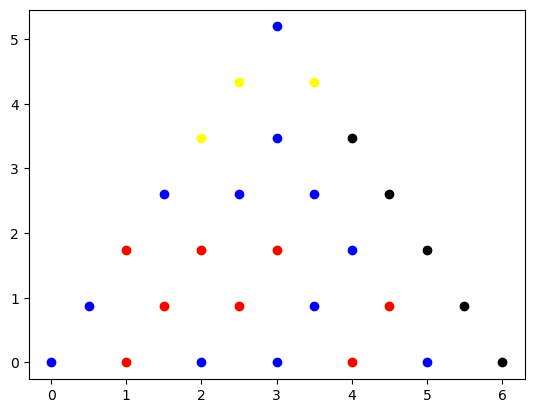

'There is not a path from the base to the segment on the right.'

In [83]:
test_for_dfs_delta_path(D_A)

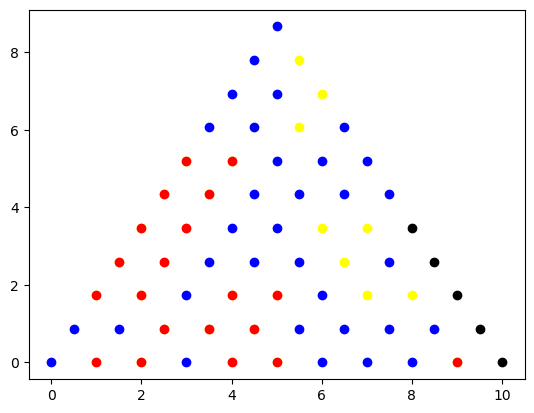

'There is not a path from the base to the segment on the right.'

In [84]:
test_for_dfs_delta_path(D_B)

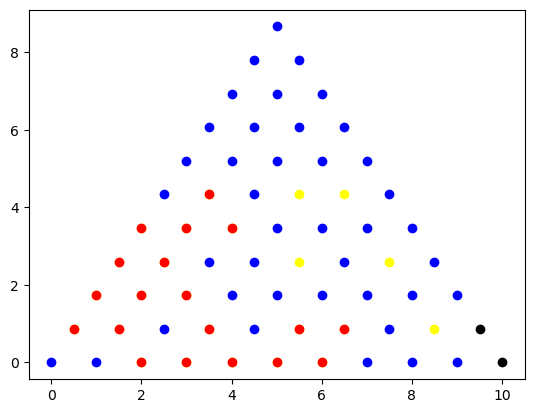

'There is not a path from the base to the segment on the right.'

In [85]:
test_for_dfs_delta_path(D_C)

Now to explore the function 

$$T_n(r)=\mathbb{P}(\text{that there is a path from the base of the equilateral triangle to the segment of the right side that extends down distance $rn$ from the top vertex}).$$

We will vary $r$ and $n$ and plot a graph.

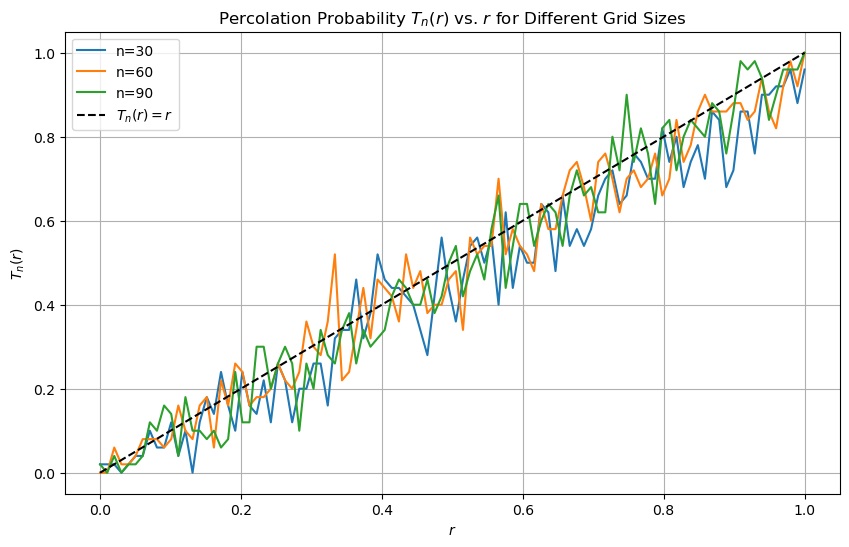

In [86]:
def delta_limit(r, n, num_trials=50):
    percolating_count = 0
    for i in range(num_trials):
        grid = delta(n,r)
        if check_percolation_d(grid):
            percolating_count += 1
    return percolating_count / num_trials


#Parameters
r_values = np.linspace(0, 1, 100)  #r values from 0 to 1
n_values = [30,60,90]  #Grid sizes


#Calculate Tn(r) for different n values
Tn_values = {n: [delta_limit(r, n) for r in r_values] for n in n_values}


#Plot Tn(p) for each n value
plt.figure(figsize=(10, 6))
for n in n_values:
    plt.plot(r_values, Tn_values[n], label=f'n={n}')

plt.plot(r_values, r_values, color='black', linestyle='--', label='$T_n(r) = r$')
plt.xlabel('$r$')
plt.ylabel('$T_n(r)$')
plt.title('Percolation Probability $T_n(r)$ vs. $r$ for Different Grid Sizes')
plt.legend()
plt.grid()

As we can see our expected values are aligning with the graph $T_{n}(r) = r$ during our tests. Currently our size of n is quite restricted, however for larger values of $n$ one can expect the data to model to $T_{n}(r) = r$ more accurately.


We now wish to show that $T_n(r)$ is invariant under rotation.

In the current model of our equilateral triangle, our triangle is the whole grid. This creates an issue for rotating, since sites can fall outside of the grid after rotation.

To accomodate for this, we will inscribe our triangle into a bigger equilateral triangle, such that all potential sites are plotted under any rotation. Since a circle is invariant under rotation, the first step is to inscribe our triangle into a circle for simplicity. Then we wish to find the smallest equilateral triangle such that our circle is inscribed within. Thankfully, the smallest equilateral triangle to inscribe our circle is exactly two times the length of the original triangle.

Next we need to find the centre for our rotation. if  $n$ is a multiple of three, our centre is at exactly $(n,n)$ in our triangular basis. Since we are taking the limit as $n$ approaches infinity of $T_{n}(r)$, We can restrict $n$ to multiples of three for simplicity.

Therefore, we will take our larger triangle to be of length $6n$ with the centre at $(2n,2n)$ with our smaller triangle of length $3n$ sharing the same centre.

In [8]:
def delta_rotate(n,r,theta=0,show = False):

    
    # To have a side length of n, each side must contain n+1 sites
    vertical = [0]
    horizontal = [0]
    sites = (6*n)+1 
    sqrt3 = (3)**0.5

    redirectionx = np.zeros((int(sites),int(sites)))
    redirectiony = np.zeros((int(sites),int(sites)))
    basepointsx = []
    basepointsy = []

    u = np.array([1,0])
    v = np.array([0.5,(0.5*((3)**0.5))])

    e2 = np.array([0,1])

    midpoint = (2*n)*u + (2*n)*v

    #Rotation: We will first change our vectors into the euclidean basis, before rotating and then converting back to the triangular basis.
    rotation = lambda x, y: (((np.cos(theta))*x - (np.sin(theta))*y)*u) + (((np.sin(theta))*x + (np.cos(theta))*y)*e2)

    # Transition Matrix (Euclidean -> Triangular)

    transition = lambda x,y: (x-(y*((3)**-0.5)))*u + (2*y*((3)**-0.5))*e2





    # Generate a triangular lattice
    matrix = np.zeros((int(sites),int(sites)))
    for i in range(sites):
        for j in range(sites-i):
            rand = random.random()
            temp = i*u+j*v
            if rand <= P_C:
                matrix[i,j] = 1
                if show==True:
                    plt.scatter(temp[0],temp[1],c='yellow')       
            else:
                matrix[i,j] = 2
                if show==True:
                    plt.scatter(temp[0],temp[1],c='blue')

    nodes = (3*n)+1


    F = (nodes-1)*r
    for i in range(nodes):
        if i > F:
                matrix[n+i,(4*n)-i] = 3
                off_t = (n+i)*u+(4*n-i)*v
                off_trans = off_t - midpoint
                off_r = rotation(off_trans[0],off_trans[1])
                off_node = off_r + midpoint


                if show==True:
                    #plt.scatter(off_t[0],off_t[1],c='grey')
                    plt.scatter(off_node[0],off_node[1],c='grey')

         
    for i in range(nodes):

        #we will take our boundary of our original smaller triangle then rotate it by theta around the centre (midpoint)
        # Since we are rotating around centre and not the origin we must translate before rotating then translate back.
        
        #the base of our original smaller triangle
        b_temp = (n+i)*u+(n*v)
        
        #Apply Rotation.
        b_trans = b_temp - midpoint
        b_r = rotation(b_trans[0],b_trans[1])
        base = b_r + midpoint


        #the left side of our original smaller triangle
        l_temp = (n*u)+(n+i)*v

        #Apply Rotation
        l_trans = l_temp - midpoint
        l_r = rotation(l_trans[0],l_trans[1])
        leftside = l_r + midpoint


        #the right side of our original smaller triangle
        r_temp = ((n+i)*u)+((4*n)-i)*v
        
        #Apply Rotation
        r_trans = r_temp - midpoint
        r_r = rotation(r_trans[0],r_trans[1])
        rightside = r_r + midpoint

        # Test for new neigbours,
        base_tri  = transition(base[0],base[1])
        left_tri  = transition(leftside[0],leftside[1])
        right_tri = transition(rightside[0],rightside[1])

        base_adjust = np.floor(base_tri)
        right_adjust = np.floor(right_tri)
        left_adjust = np.floor(left_tri)

        bmin = 100
        lmin = 100
        rmin = 100
    
    #we will now compare all sites which live in a radius of 1 from our boundary point after rotation. 
    #Then we'll assign the closest site as it's new location.
    
    # __0 and ___1 are it's coordinates in euclidean and ___mat0 and ___mat1 are it's coordinates in triangular to store in the matrix
    
        for l in [-1,0,1]:
            for m in [-1,0,1]:
                compare = (base_adjust[0]+l)*u +(base_adjust[1]+m)*v
                distance = ((((base[0]-compare[0])**2)) +((base[1]-compare[1])**2))**0.5
                if distance < bmin:
                    bmin = distance
                    base0 = compare[0]
                    base1 = compare[1]
                    basemat0 = base_adjust[0]+l
                    basemat1 = base_adjust[1]+m

        for l in [-1,0,1]:
            for m in [-1,0,1]:
                compare = (right_adjust[0]+l)*u +(right_adjust[1]+m)*v
                distance = ((((rightside[0]-compare[0])**2)) +((rightside[1]-compare[1])**2))**0.5
                if distance < rmin:
                    rmin = distance
                    right0 = compare[0]
                    right1 = compare[1]
                    rightmat0 = right_adjust[0]+l
                    rightmat1 = right_adjust[1]+m
                    

        for l in [-1,0,1]:
            for m in [-1,0,1]:
                compare = (left_adjust[0]+l)*u +(left_adjust[1]+m)*v
                distance = ((((leftside[0]-compare[0])**2)) + ((leftside[1]-compare[1])**2))**0.5
                if distance < lmin:
                    lmin = distance
                    left0 = compare[0]
                    left1 = compare[1]
                    leftmat0 = left_adjust[0]+l
                    leftmat1 = left_adjust[1]+m
        

        rightmat0 =int(rightmat0)
        rightmat1 =int(rightmat1)

        redirectionx[n+i,4*n-i] = rightmat0 # This is assigned so we can quickly identify which sites to 'black out' later
        redirectiony[n+i,4*n-i] = rightmat1
        
        matrix[rightmat0,rightmat1] = 6 # To get DFS to stop if it arrives at the RHS
        plt.scatter(right0,right1,c='orange')


        plt.scatter(base0,base1,c='orange')
        basemat0 =int(basemat0)
        basemat1 =int(basemat1)
        
        basepointsx.append(basemat0) #This is to identify where to start for dfs.
        basepointsy.append(basemat1)
        matrix[basemat0,basemat1] = 4 # Get the base to be identified for dfs restrictions

        leftmat0 = int(leftmat0)
        leftmat1 = int(leftmat1)
        matrix[leftmat0,leftmat1] = 5  # Get the LHS to be identified for dfs restriction
        plt.scatter(left0,left1,c='orange')
        
        # This is to 'orientate' ourself for dfs
        if i == 0:
            if right1 >= base1:
                vertical = 1
            if right0 >= base0:
                horizontal = 1
                
                
    # shortens our right side by r*n, and colours the nodes that have been 'removed' black          
    for i in range(nodes):
        if i > F:
            tempx = redirectionx[n+i,4*n-i]
            tempy = redirectiony[n+i,4*n-i]
            tempx = int(tempx)
            tempy = int(tempy)
            matrix[tempx,tempy] = 3
            tempxy = tempx*u+tempy*v
            plt.scatter(tempxy[0],tempxy[1],c='black')

    


            
            


                
    matrix_t = matrix.transpose()

    

    
    if show:
        plt.show()
    return matrix_t, horizontal, vertical, basepointsx, basepointsy

Here are some examples, using equilateral triangles of side length $5$, and a range of values for $r$ and $\theta$.

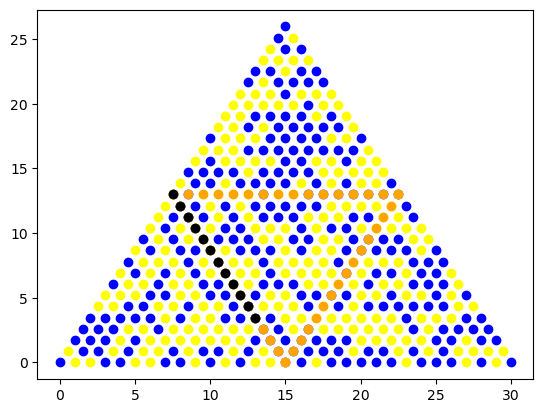

In [9]:
RA = delta_rotate(5,0.25,(np.pi), True)

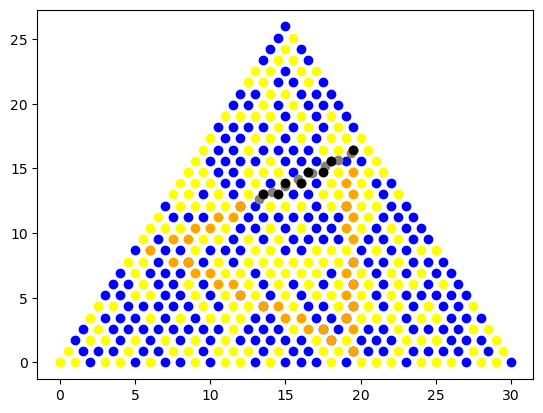

In [20]:
RB = delta_rotate(5,0.5,(np.pi/2), True)

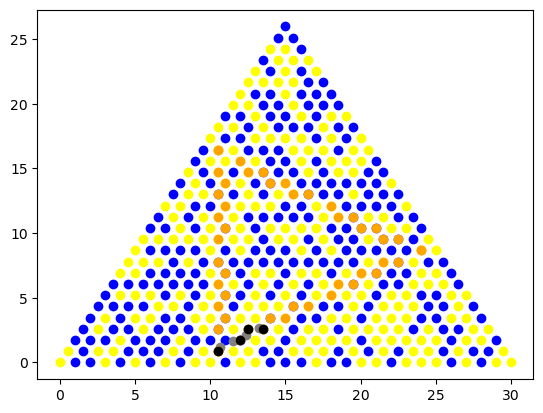

In [21]:
RC = delta_rotate(5,0.75,(3*np.pi/2), True)

The following function is intended to search for a path from the base to the segment $rn$ from the top vertex after rotation. This code is incomplete with further discussion below.

In [11]:
def dfs_rotate(matrix_d, visited, xtraverse, ytraverse, row, col, N,horizontal,vertical):
    # Check if the current site is out of bounds or has already been visited, or if it
    # lies on a boundary, a blue site, or an empty site.    
    if row < 0 or row >= N or col < 0 or col >= N or matrix_d[row, col] == 3 or matrix_d[row, col] == 2 or matrix_d[row, col] == 0  or visited[row, col]:
        return False
    
    visited[row, col] = True
    u = np.array([1,0])
    v = np.array([0.5,(0.5*((3)**0.5))])
    temp = col*u+row*v
    xtraverse.append(temp[0])
    ytraverse.append(temp[1])
    
    if matrix_d[row,col] == 6:
        return True  # Found a path to the right side
    
    #Check in all 6 directions for yellow cells
    
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (1,-1),(-1,1)]
    up = [(0, 1),(-1,1)]
    down = [(0, -1),(1,-1)]
    left = [(-1, 0), (0, -1),(-1,1)]
    right = [(1, 0), (0, 1), (1,-1)]
    hor = [up,down]
    ver = [right,left]
    if matrix_d[row,col] == 1:
        for (dr, dc) in directions:
            if dfs_rotate(matrix_d, visited, xtraverse, ytraverse, row + dr, col + dc, N):
                return True
    if matrix_d[row,col] == 4 or 5:
        if horizontal == 1:
            for (dr,dc) in down:
                if  matrix_d[row+dr,col+dc] == 4 or 5 or 6:
                    if dfs_rotate(matrix_d, visited, xtraverse, ytraverse, row + dr, col + dc, N):
                        return True
            for (dr,dc) in up:
                if dfs_rotate(matrix_d, visited, xtraverse, ytraverse, row + dr, col + dc, N):
                    return True
        if horizontal == 0:
            for (dr,dc) in up:
                if  matrix_d[row+dr,col+dc] == 4 or 5 or 6:
                    if dfs_rotate(matrix_d, visited, xtraverse, ytraverse, row + dr, col + dc, N):
                        return True
                for (dr,dc) in down:
                    if dfs_rotate(matrix_d, visited, xtraverse, ytraverse, row + dr, col + dc, N):
                        return True
        
        if vertical == 1:
            for (dr,dc) in left:
                if  matrix_d[row+dr,col+dc] == 4 or 5 or 6:
                    if dfs_rotate(matrix_d, visited, xtraverse, ytraverse, row + dr, col + dc, N):
                        return True
            for (dr,dc) in right:
                if dfs_rotate(matrix_d, visited, xtraverse, ytraverse, row + dr, col + dc, N):
                    return True
        if vertical == 0:
            for (dr,dc) in right:
                if  matrix_d[row+dr,col+dc] == 4 or 5 or 6:
                    if dfs_rotate(matrix_d, visited, xtraverse, ytraverse, row + dr, col + dc, N):
                        return True
            for (dr,dc) in up:
                if dfs_rotate(matrix_d, visited, xtraverse, ytraverse, row + dr, col + dc, N):
                    return True
            
    return False

def check_percolation_r(matrix_d, horizontal, vertical, bx, by, show = True):
    N,N = np.shape(matrix_d)
    visited = np.zeros((N, N), dtype=bool)
    xtraverse = []
    ytraverse = []
    
    #Use dfs_rotate recursively to look for a path
    for i in range(len(bx)):
        if dfs_rotate(matrix_d, visited, xtraverse, ytraverse, bx[i], by[i], N,horizontal,vertical):
            
                #If show == True, show the path in red and the sites not in the segment rn in black
                if show:
                    for i in range(N):
                        for j in range(N):
                            u = np.array([1,0])
                            v = np.array([0.5,(0.5*((3)**0.5))])
                            temp = i*u + j*v
                            matrix = matrix_d.transpose()
                            if matrix[i,j] == 1:
                                plt.scatter(temp[0],temp[1],c='yellow')
                            if matrix[i,j] == 2:
                                plt.scatter(temp[0],temp[1],c='blue')
                            if matrix[i,j] == 3:
                                plt.scatter(temp[0],temp[1],c='black')
                                
                    for i in range(len(xtraverse)):
                        plt.scatter(xtraverse[i],ytraverse[i],c='red')
                    plt.show()
                return True
    if show:
        for i in range(N):
            for j in range(N):
                u = np.array([1,0])
                v = np.array([0.5,(0.5*((3)**0.5))])
                temp = i*u + j*v
                matrix = matrix_d.transpose()
                if matrix[i,j] == 1:
                    plt.scatter(temp[0],temp[1],c='yellow')
                if matrix[i,j] == 2:
                    plt.scatter(temp[0],temp[1],c='blue')
                if matrix[i,j] == 3:
                    plt.scatter(temp[0],temp[1],c='black')
                                
        for i in range(len(xtraverse)):
            plt.scatter(xtraverse[i],ytraverse[i],c='red')
        plt.show()        
    return False

In [12]:
def test_for_dfs_rotate(matrix_d, horizontal, vertical, bx, by,show): # Checking for a path using dfs, and displaying the reachable squares
    if check_percolation_r(matrix_d, horizontal, vertical, bx, by, show):
        return 'There is a path from the base to the segment on the right.'
    else:
        return 'There is not a path from the base to the segment on the right.'

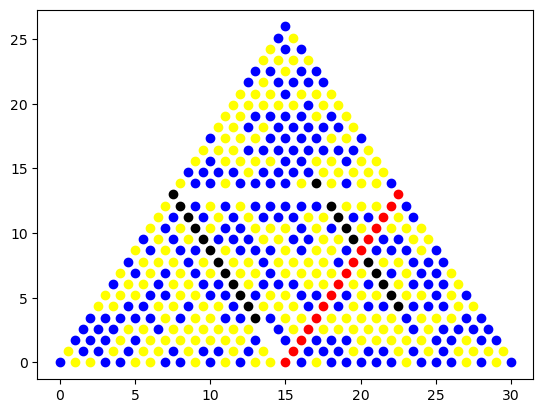

'There is not a path from the base to the segment on the right.'

In [13]:
matrix_d, horizontal, vertical, bx, by = RA
test_for_dfs_rotate(matrix_d, horizontal, vertical, bx, by,True)

From the graph above, it is clear that the Depth First function for $\Delta$ is not working as intended. The issue lies with determining the boundary for the path-finding algorithm, and restricting the search within the smaller equilateral triangle. Currently, the function attempts to search for paths outside of the smaller equilateral triangle. We could not determine a solution to this.



## Conclusion
In conclusion, this project aimed to explore percolation with the primary aim of finding the critical point of percolation, $p_c$, in a variety of contexts. We found the critical points for square, rectangular and triangular grids. We optimised our path-finding algorithms along the way, allowing us to find critical points of larger grids more efficiently. 

We found that the number of neighbouring sites, not the shape of the grid, defines the value of the critical point. This led us to explore triangle lattices on infinite grids, attempting to determine how rotation affects percolation. 

## References

    -[1] Sahimi, M. (2023) 'Applications of percolation theory', Second edition. Cham: Springer. Available at: https://doi.org/10.1007/978-3-031-20386-2.
    -[2] Needham, M. and Hodler, A.E. (2019) 'Chapter 4: Pathfinding and Graph Search Algorithms', in Graph Algorithms : Practical Examples in Apache Spark and Neo4j. 
    -[3] Shute, A. (2024) 'Topics in Discrete Maths and Modern Geometry: An Introduction to Lattices', University of Bristol.
    -[4] Rickard, J. and Cox, C. (2023) 'Linear Algebra 2', University of Bristol.